In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
import pandas as pd
data=pd.read_csv("/content/sample_data/BRAIN TUMOR.csv")

In [ ]:
data.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,T64171,T54547,M95936,X54162,H57136,M10373,T55200,T46924,L11708,M18079,T46933,M98331,H54425,M76378,M26393,H59796,M82962,T55255,L13773,X53416.1,M63391,M63603,R33881,M95787,J03037,J02854,H37925,M83186,T72257,...,J03464.2,X54942,U17899,R36977,X05231,T87871.1,X72755,U33635,M26383,R83313.1,R32511,X54942.1,X17668,Z48481,T60780,U33286,H50438,L29254,M77349,R08183,X02530,L23808,M36821,D21262,T89991,M77836,H64555,M61832,J04765,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,25,14,34,54,27,2,4,-104,34,12,7,0,39,39,13,-11,7,0,6,50,85,205,23,-50,235,4,67,7,6,20,...,63,160,30,159,24,69,-2,66,114,35,62,98,4,141,260,96,31,73,143,287,1,27,137,96,-4,108,4,224,18,44,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,9,23,-2,-17,12,-9,-3,-25,17,-43,18,41,15,24,38,-2,-16,2,3,59,207,124,16,-6,102,13,70,5,14,-2,...,66,388,54,100,91,63,16,46,338,63,14,359,31,87,65,76,57,109,184,450,17,62,206,74,-2,106,31,198,24,110,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,4,6,5,-8,5,-11,13,-52,20,11,13,28,13,22,39,27,-2,5,3,48,87,108,16,29,98,19,30,2,25,29,...,56,258,46,94,64,51,113,40,122,53,48,193,82,113,203,90,81,43,87,421,61,73,196,77,-6,123,3,89,10,98,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,22,20,45,49,26,12,11,-88,25,22,15,19,2,27,44,9,11,17,3,64,628,197,28,29,280,4,84,7,18,27,...,79,177,82,87,51,45,42,34,59,34,27,57,14,135,72,127,69,20,337,370,20,70,119,28,4,51,155,154,36,54,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,-5,12,-7,4,4,-6,5,-68,21,50,-2,44,5,4,22,61,3,37,7,70,4,76,5,51,14,0,22,3,-55,0,...,47,250,20,91,15,29,67,23,40,61,22,288,111,-7,67,109,45,135,124,504,85,96,337,39,-4,122,-1,258,6,142,87,303,204,81,105,9,265,-2,126,tumor


In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000,784).astype('float32')
x_valid = x_valid.reshape(10000,784).astype('float32')

In [ ]:
x_train/=255
x_valid/=255

In [ ]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_pred==1

In [ ]:
from keras import utils as np_utils
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_pred=y_valid[-1]

In [ ]:
x_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64, activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.02),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=125,epochs=75,verbose=1)


Epoch 1/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0346 - accuracy: 0.8301
Epoch 2/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.8325
Epoch 3/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.8338
Epoch 4/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0335 - accuracy: 0.8362
Epoch 5/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0331 - accuracy: 0.8376
Epoch 6/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0328 - accuracy: 0.8396
Epoch 7/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0325 - accuracy: 0.8411
Epoch 8/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0321 - accuracy: 0.8425
Epoch 9/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0318 - accuracy: 0.8440
Epoch 10/75
480/480 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.8457

In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.02),metrics=['accuracy'])
history=model.fit(x_valid,y_valid,batch_size=125,epochs=75,verbose=1)

Epoch 1/75
80/80 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.8891
Epoch 2/75
80/80 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.8893
Epoch 3/75
80/80 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.8896
Epoch 4/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.8895
Epoch 5/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.8894
Epoch 6/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.8896
Epoch 7/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.8898
Epoch 8/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.8899
Epoch 9/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.8899
Epoch 10/75
80/80 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.8899
Epoch 11/75
80/80 [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Text(0.5, 0, 'epochs')

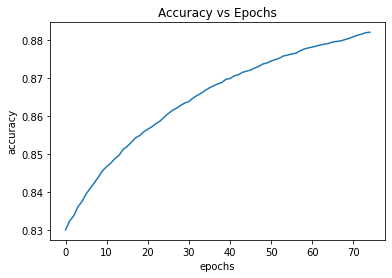

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epochs')